In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/kc_house_data.csv')

we check if we have any missing data

In [3]:
#df.isnull().sum()

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


/home/hector/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensi

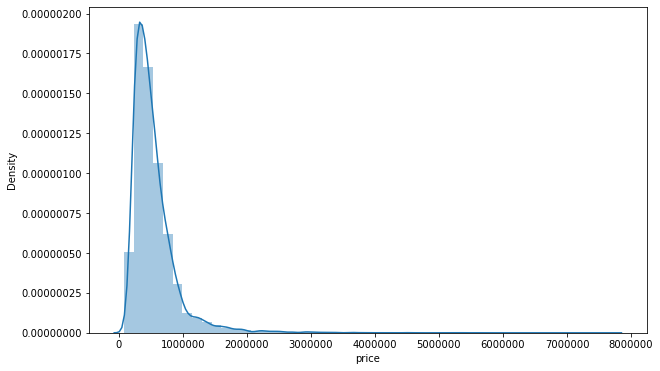

In [5]:
plt.figure(figsize=(10,6))

sns.distplot(a=df['price'])

We can also explore if there is any feature that is correlated with another one

In [6]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

Seems that the squarefeet living is higly correlated with the price. SO we can explore this in a scatterplot

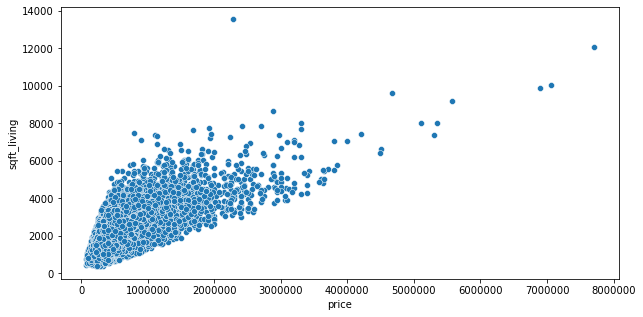

In [7]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price', y = 'sqft_living', data = df)

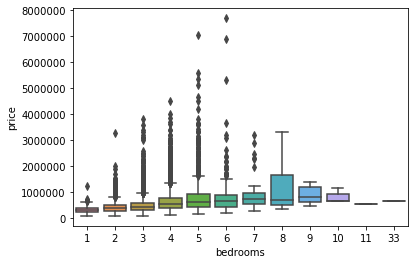

In [8]:
sns.boxplot(data=df, x='bedrooms', y='price')

We can explore in a scatterplot about latitude and longitude

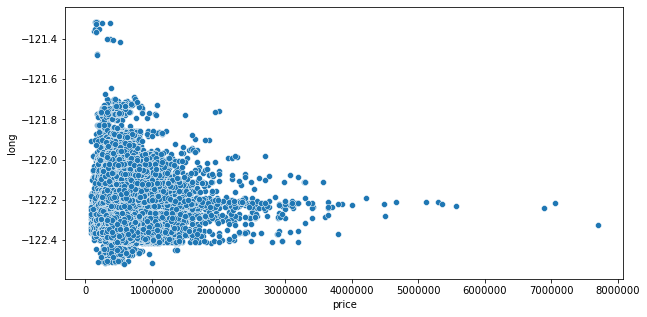

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='price', y ='long')

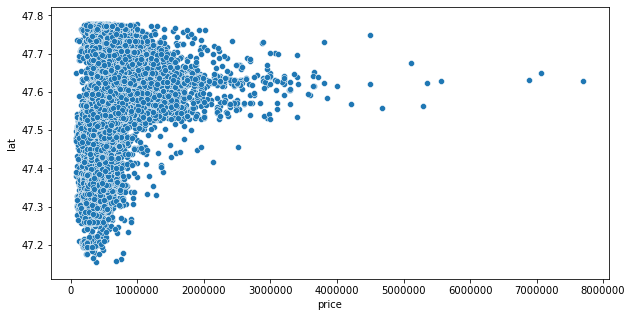

In [10]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='price', y ='lat')

This can aproximately create a map

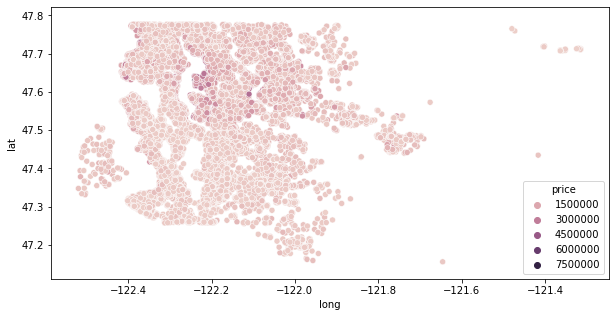

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='long', y ='lat', hue='price')

We observe that there are few houses that are so expensive, so they don let us see a profitable map above, so we can remove them in a new data base in order to get a more clear map

In [12]:
df.sort_values(by='price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


So we sort our houses by price and then select the hoses below number 216, which is aproximately a 1% of our dataset

In [13]:
non_top_price = df.sort_values(by='price', ascending=False).iloc[216:]

We observe with the new map, how houses next to waer sources tend to be more expensive. And we can confrim this with a boxplot

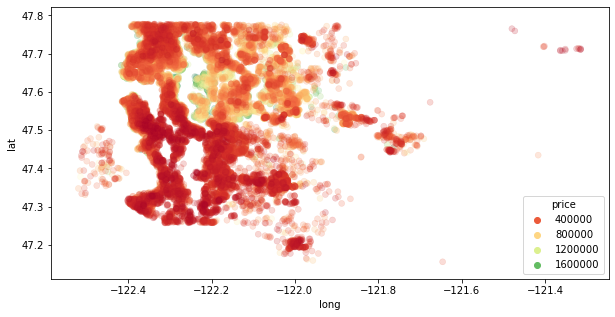

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=non_top_price, x='long', y ='lat', hue='price',
               edgecolor=None, alpha=0.2, palette='RdYlGn')

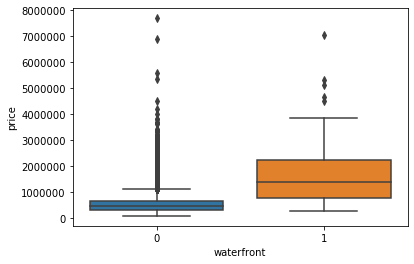

In [15]:
sns.boxplot(x='waterfront', y='price', data=df)

## Here we begin our feature engeniering and getting rid of some of them which are not usefull

In [16]:
df= df.drop('id', axis=1)

In [17]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

THis is actually a string, so we can convert it into date type. Then we can extract the year component or the month isolated, so we can use it somehow

In [18]:
df['date'] = pd.to_datetime(df['date'])

In [19]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

For example I can create new column

lambda function is the same as:

In [20]:
def year_extraction(date):
    return date.year

In [21]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [22]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2


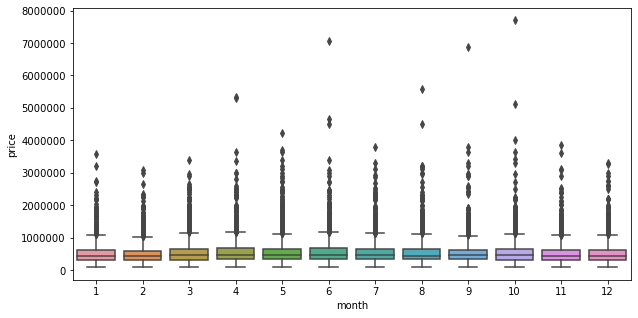

In [23]:
plt.figure(figsize=(10,5))

sns.boxplot(x='month', y='price', data=df)

We observe that there is no remarkable difference between the month the houses we set to sell

In [24]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

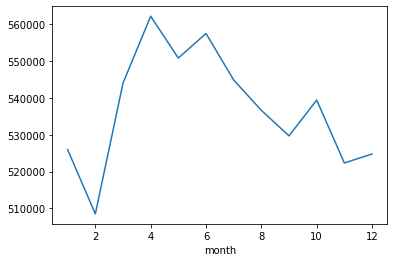

In [25]:
df.groupby('month').mean()['price'].plot()

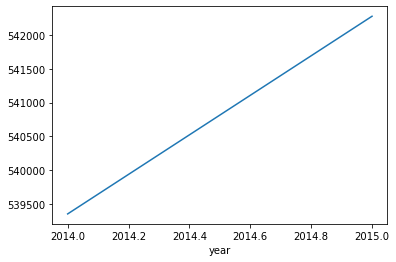

In [26]:
df.groupby('year').mean()['price'].plot()

In [27]:
df = df.drop('date', axis=1)

In [28]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2


In [29]:
df = df.drop('zipcode', axis=1)

# Keras regression code along

We will creat a model to predict house prices. First of all we must separate our feature fromour label

To make sure there is no issue between the pandas datatypes and the numpy numerics, we call the function .values
.values returns the numpy array underneath the actual dataframe our pandas series

In [30]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Now we proceed to scale our data

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

We can save time by doing fit and then transform in the same operation. In our first neural net we have done separately

In [35]:
X_train = scaler.fit_transform(X_train)

In [36]:
X_test = scaler.transform(X_test)

Once our data is scaled we can create our model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-08-12 09:35:17.080411: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-12 09:35:20.107918: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-12 09:35:20.113244: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-12 09:35:28.916120: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


We will try to set the number of neurons on our layers based in the size of our feature data

In [38]:
X_train.shape

(15117, 19)

We have 19 features, so we can set 19 neurones.

Additionally we want to see if we can use early stopping in order to select the correct number of epochs to train for, and also the correct number of layers to train for. But we will get to this point later on

In [39]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

## we use the optimizer adam because it works pretty well
## Since it is a regression and not a classification we can use the mse as evaluator
model.compile(optimizer='adam', loss='mse')

We will fit our model in the train data. Additionally we will use the validation data. What validation data does is after each epoch of training on the training data, this will qickly run the test data and check our loss on the test data. So we can track how well performing not just on our training data, but also on our test data. 

THis test data will not have an effect on the biases or weights of our net. Keras isn't going to update our model based on the test data or the validation data. Instead it will only use the training data as it's updating the weights and biases and continue to check how well it's doing on the training data and the validation data. With this we can ensure that we are not overfitting

Secondly we are going to feed in our data in batches(64,1128,256, usually powers of 2). The smaller the batch size, the longer the training is going to take, but the less likely we are going to overfit to our data, because we are not passing our entire training set at once.

Finally we set 400 as the number of epochs. That way we can see those nice curves and also compare our training performance to our test performance .We don't any early stoping mechanism yet, we will lear about them later on.


In [40]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test, y_test),
         batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 4ms/step - loss: 430241513472.0000 - val_loss: 418924003328.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 429172686848.0000 - val_loss: 415108890624.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 413605756928.0000 - val_loss: 379193262080.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 336439738368.0000 - val_loss: 255029493760.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 184101289984.0000 - val_loss: 115369377792.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 104002977792.0000 - val_loss: 95439241216.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 97892696064.0000 - val_loss: 93946699776.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 96253353984.0000 - val_loss: 92379455488.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 2ms/step - loss: 38547939328.0000 - val_loss: 37296275456.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 38353166336.0000 - val_loss: 37086441472.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 38139068416.0000 - val_loss: 36892606464.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 37952184320.0000 - val_loss: 36725215232.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 37786677248.0000 - val_loss: 36503281664.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 37590532096.0000 - val_loss: 36458119168.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 37429690368.0000 - val_loss: 36161540096.0000
Epoch 75/400
119/119 [==============================] - 0s 2ms/step - loss: 37275365376.0000 - val_loss: 36009336832.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 33155092480.0000 - val_loss: 31948482560.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 33185269760.0000 - val_loss: 31761745920.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 33108058112.0000 - val_loss: 31718750208.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 33065650176.0000 - val_loss: 31717740544.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 33063481344.0000 - val_loss: 31641503744.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 33023899648.0000 - val_loss: 31609999360.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 32982265856.0000 - val_loss: 31566649344.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 32963016704.0000 - val_loss: 31535527936.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 31675373568.0000 - val_loss: 30106902528.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 31675260928.0000 - val_loss: 30024814592.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 31697690624.0000 - val_loss: 30058715136.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 31649531904.0000 - val_loss: 29990371328.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 31640125440.0000 - val_loss: 29990580224.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 31618631680.0000 - val_loss: 29958481920.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 31592876032.0000 - val_loss: 29950140416.0000
Epoch 208/400
119/119 [==============================] - 0s 2ms/step - loss: 31583324160.0000 - val_loss: 29960376320.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30822805504.0000 - val_loss: 29347690496.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30857963520.0000 - val_loss: 29145548800.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30875156480.0000 - val_loss: 29067243520.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30880190464.0000 - val_loss: 29029904384.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 30851649536.0000 - val_loss: 29104164864.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30827933696.0000 - val_loss: 29046288384.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 30841397248.0000 - val_loss: 29124931584.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 30816862208.0000 - val_loss: 29002668032.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30323396608.0000 - val_loss: 28366202880.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 30334222336.0000 - val_loss: 28330375168.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 30290628608.0000 - val_loss: 28500238336.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 30330638336.0000 - val_loss: 28431058944.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 30300571648.0000 - val_loss: 28340940800.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 30252834816.0000 - val_loss: 28405004288.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 30318012416.0000 - val_loss: 28384606208.0000
Epoch 340/400
119/119 [==============================] - 0s 2ms/step - loss: 30320011264.0000 - val_loss: 28365260800.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29874116608.0000 - val_loss: 27778099200.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 29822023680.0000 - val_loss: 27830355968.0000


Now we see how our loss did through the 400 epochs

In [41]:
model.history.history

{'loss': [430241513472.0,
  429172686848.0,
  413605756928.0,
  336439738368.0,
  184101289984.0,
  104002977792.0,
  97892696064.0,
  96253353984.0,
  94604550144.0,
  92948054016.0,
  91232501760.0,
  89479176192.0,
  87655972864.0,
  85818646528.0,
  83814645760.0,
  81864785920.0,
  79750709248.0,
  77554581504.0,
  75375992832.0,
  73071296512.0,
  70670254080.0,
  68268609536.0,
  65842954240.0,
  63491026944.0,
  61206466560.0,
  59130118144.0,
  57233784832.0,
  55593963520.0,
  54144192512.0,
  52909297664.0,
  51937009664.0,
  51128590336.0,
  50424279040.0,
  49812561920.0,
  49211600896.0,
  48693563392.0,
  48224382976.0,
  47817822208.0,
  47451598848.0,
  46996197376.0,
  46626816000.0,
  46260084736.0,
  45875765248.0,
  45512794112.0,
  45123047424.0,
  44776321024.0,
  44418461696.0,
  44031139840.0,
  43691528192.0,
  43456516096.0,
  43027206144.0,
  42712506368.0,
  42492264448.0,
  42153369600.0,
  41874964480.0,
  41621778432.0,
  41341390848.0,
  41079148544.0,


We can turn it into a pandas df. Theh we will get the loss of the training data and the loss of the validation data(val_loss). Then we can observe if we are overfitting data. It is easier to see it if we plot it out

In [42]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,4.302415e+11,4.189240e+11
1,4.291727e+11,4.151089e+11
2,4.136058e+11,3.791933e+11
3,3.364397e+11,2.550295e+11
4,1.841013e+11,1.153694e+11
...,...,...
395,2.990667e+10,2.778603e+10
396,2.985285e+10,2.778687e+10
397,2.995571e+10,2.778890e+10
398,2.987412e+10,2.777810e+10


In [43]:
losses =pd.DataFrame(model.history.history)

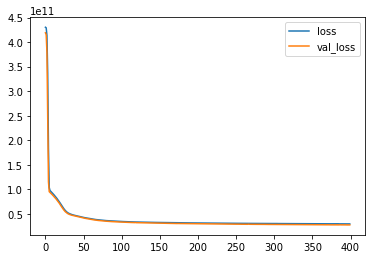

In [44]:
losses.plot()

This is exactly how it should look like for not overfitting, both of them  quite alike. There is a decrease and then there is no increase so far in the validation set. So we can continue training.

If the val_loss begins to rise after some of these epochs, it means we are overfitting to our training data beacuse we have a much larger loss in the validation set

Now we will carry out a validation on our test data

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [77]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 1ms/step


In [78]:
predictions

array([[391541.6 ],
       [589188.06],
       [555082.9 ],
       ...,
       [369006.5 ],
       [554162.7 ],
       [660638.75]], dtype=float32)

In [48]:
mean_squared_error(y_test, predictions)

27830353592.492786

In [49]:
mean_squared_error(y_test, predictions)**0.5

166824.31954751918

In [50]:
mean_absolute_error(y_test, predictions)

102340.01438922646

In [51]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

we observe that our error and our mean value are in the same magnitude order, so it seems not great. 

What we can do is see the variance score. The best value should be 1

In [52]:
explained_variance_score(y_test, predictions)

0.790499684999953

We could essentially keep trainning our with our train data, beacuse we are not overfitting. so we could carry out more epochs.

We can also see a plot. Since the predictions and the real values should perform an straight line.

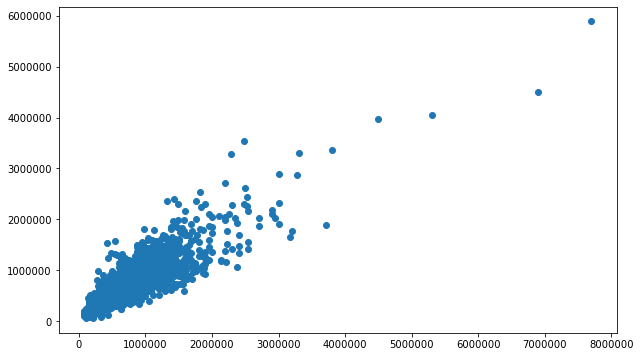

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions)

We observe that it is not a straight line

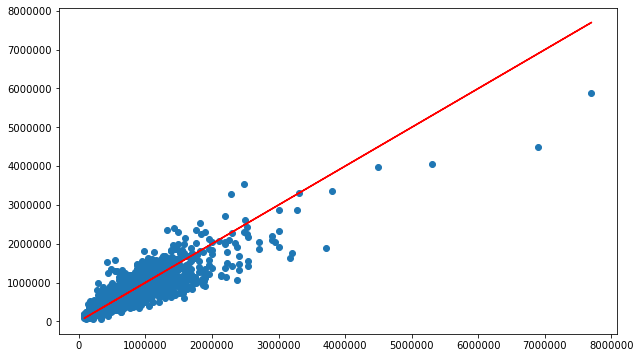

In [55]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r') # y_test and predictions should behave like this

We observe that the most expensive houses are punshing our model, since they deviate way much from the prefect line. 

Maybe It would be a good option to train our model without the most expensive houses

# We will try it again with the 99% of the houses, wich price i lower   non_top_price

first we have to clean our data set again. But since df is already clean we will save time with this

In [63]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12


In [64]:
non_top_price = df.sort_values(by='price', ascending=False).iloc[216:]

In [66]:
non_top_price.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
6329,1970000.0,4,3.5,4370,8510,2.0,0,1,3,10,3610,760,2003,0,47.5876,-122.204,2960,10347,2014,6
12271,1960000.0,5,4.5,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,47.5632,-122.215,3700,14486,2014,10


first we split our data

In [67]:
X_non_top = non_top_price.drop(['price'], axis=1).values
y_non_top = non_top_price['price'].values

In [68]:
X_train_non_top, X_test_non_top, y_train_non_top, y_test_non_top = train_test_split(
                                                        X_non_top, y_non_top,
                                                    test_size=0.3, random_state=101)

Now we scale our data

In [69]:
X_train_non_top = scaler.fit_transform(X_train_non_top)


In [70]:
X_test_non_top = scaler.transform(X_test_non_top)

Now we creat our model

In [72]:
model_non_top = Sequential()

model_non_top.add(Dense(19, activation='relu'))
model_non_top.add(Dense(19, activation='relu'))
model_non_top.add(Dense(19, activation='relu'))
model_non_top.add(Dense(19, activation='relu'))

model_non_top.add(Dense(1))

## we use the optimizer adam because it works pretty well
## Since it is a regression and not a classification we can use the mse as evaluator
model_non_top.compile(optimizer='adam', loss='mse')

Now we train our model with the train data

In [73]:
model_non_top.fit(X_train_non_top,y_train_non_top,
                  validation_data=(X_test_non_top,y_test_non_top),
                  batch_size= 128, epochs=400)

Epoch 1/400
117/117 [==============================] - 1s 3ms/step - loss: 346875101184.0000 - val_loss: 356865376256.0000
Epoch 2/400
117/117 [==============================] - 0s 2ms/step - loss: 346186448896.0000 - val_loss: 354389524480.0000
Epoch 3/400
117/117 [==============================] - 0s 2ms/step - loss: 336059891712.0000 - val_loss: 330203660288.0000
Epoch 4/400
117/117 [==============================] - 0s 2ms/step - loss: 283735621632.0000 - val_loss: 239895592960.0000
Epoch 5/400
117/117 [==============================] - 0s 2ms/step - loss: 164293607424.0000 - val_loss: 102977855488.0000
Epoch 6/400
117/117 [==============================] - 0s 2ms/step - loss: 68907384832.0000 - val_loss: 56367099904.0000
Epoch 7/400
117/117 [==============================] - 0s 2ms/step - loss: 53782056960.0000 - val_loss: 54103150592.0000
Epoch 8/400
117/117 [==============================] - 0s 2ms/step - loss: 52784594944.0000 - val_loss: 53228376064.0000
Epoch 9/400
117/117 [=

117/117 [==============================] - 0s 2ms/step - loss: 23248738304.0000 - val_loss: 24064200704.0000
Epoch 69/400
117/117 [==============================] - 0s 2ms/step - loss: 23176998912.0000 - val_loss: 24009969664.0000
Epoch 70/400
117/117 [==============================] - 0s 2ms/step - loss: 23128952832.0000 - val_loss: 23963029504.0000
Epoch 71/400
117/117 [==============================] - 0s 2ms/step - loss: 23062450176.0000 - val_loss: 23923781632.0000
Epoch 72/400
117/117 [==============================] - 0s 2ms/step - loss: 23028113408.0000 - val_loss: 23935942656.0000
Epoch 73/400
117/117 [==============================] - 0s 2ms/step - loss: 22968956928.0000 - val_loss: 23846199296.0000
Epoch 74/400
117/117 [==============================] - 0s 2ms/step - loss: 22937800704.0000 - val_loss: 23849871360.0000
Epoch 75/400
117/117 [==============================] - 0s 2ms/step - loss: 22881472512.0000 - val_loss: 23752996864.0000
Epoch 76/400
117/117 [===============

Epoch 135/400
117/117 [==============================] - 0s 2ms/step - loss: 21326680064.0000 - val_loss: 22317314048.0000
Epoch 136/400
117/117 [==============================] - 0s 2ms/step - loss: 21321674752.0000 - val_loss: 22305124352.0000
Epoch 137/400
117/117 [==============================] - 0s 2ms/step - loss: 21308260352.0000 - val_loss: 22350049280.0000
Epoch 138/400
117/117 [==============================] - 0s 2ms/step - loss: 21290635264.0000 - val_loss: 22277433344.0000
Epoch 139/400
117/117 [==============================] - 0s 2ms/step - loss: 21285193728.0000 - val_loss: 22268385280.0000
Epoch 140/400
117/117 [==============================] - 0s 2ms/step - loss: 21263364096.0000 - val_loss: 22246983680.0000
Epoch 141/400
117/117 [==============================] - 0s 2ms/step - loss: 21260464128.0000 - val_loss: 22238015488.0000
Epoch 142/400
117/117 [==============================] - 0s 2ms/step - loss: 21241831424.0000 - val_loss: 22225786880.0000
Epoch 143/400
11

117/117 [==============================] - 0s 2ms/step - loss: 20845733888.0000 - val_loss: 21786974208.0000
Epoch 202/400
117/117 [==============================] - 0s 2ms/step - loss: 20850249728.0000 - val_loss: 21857443840.0000
Epoch 203/400
117/117 [==============================] - 0s 2ms/step - loss: 20849575936.0000 - val_loss: 21779445760.0000
Epoch 204/400
117/117 [==============================] - 0s 2ms/step - loss: 20847763456.0000 - val_loss: 21804802048.0000
Epoch 205/400
117/117 [==============================] - 0s 2ms/step - loss: 20829816832.0000 - val_loss: 21771939840.0000
Epoch 206/400
117/117 [==============================] - 0s 2ms/step - loss: 20837062656.0000 - val_loss: 21780942848.0000
Epoch 207/400
117/117 [==============================] - 0s 2ms/step - loss: 20825249792.0000 - val_loss: 21763395584.0000
Epoch 208/400
117/117 [==============================] - 0s 2ms/step - loss: 20823111680.0000 - val_loss: 21755183104.0000
Epoch 209/400
117/117 [=======

117/117 [==============================] - 0s 2ms/step - loss: 20673009664.0000 - val_loss: 21578752000.0000
Epoch 268/400
117/117 [==============================] - 0s 2ms/step - loss: 20665387008.0000 - val_loss: 21565648896.0000
Epoch 269/400
117/117 [==============================] - 0s 2ms/step - loss: 20663830528.0000 - val_loss: 21612906496.0000
Epoch 270/400
117/117 [==============================] - 0s 2ms/step - loss: 20677009408.0000 - val_loss: 21632782336.0000
Epoch 271/400
117/117 [==============================] - 0s 2ms/step - loss: 20668700672.0000 - val_loss: 21570897920.0000
Epoch 272/400
117/117 [==============================] - 0s 2ms/step - loss: 20692191232.0000 - val_loss: 21575249920.0000
Epoch 273/400
117/117 [==============================] - 0s 2ms/step - loss: 20659630080.0000 - val_loss: 21581240320.0000
Epoch 274/400
117/117 [==============================] - 0s 2ms/step - loss: 20668348416.0000 - val_loss: 21549862912.0000
Epoch 275/400
117/117 [=======

117/117 [==============================] - 0s 2ms/step - loss: 20553674752.0000 - val_loss: 21446985728.0000
Epoch 334/400
117/117 [==============================] - 0s 2ms/step - loss: 20540172288.0000 - val_loss: 21437544448.0000
Epoch 335/400
117/117 [==============================] - 0s 2ms/step - loss: 20532975616.0000 - val_loss: 21417203712.0000
Epoch 336/400
117/117 [==============================] - 0s 2ms/step - loss: 20533590016.0000 - val_loss: 21436016640.0000
Epoch 337/400
117/117 [==============================] - 0s 2ms/step - loss: 20534659072.0000 - val_loss: 21471430656.0000
Epoch 338/400
117/117 [==============================] - 0s 2ms/step - loss: 20530100224.0000 - val_loss: 21430984704.0000
Epoch 339/400
117/117 [==============================] - 0s 2ms/step - loss: 20532078592.0000 - val_loss: 21421170688.0000
Epoch 340/400
117/117 [==============================] - 0s 2ms/step - loss: 20517005312.0000 - val_loss: 21412757504.0000
Epoch 341/400
117/117 [=======

117/117 [==============================] - 0s 2ms/step - loss: 20371707904.0000 - val_loss: 21358825472.0000
Epoch 400/400
117/117 [==============================] - 0s 2ms/step - loss: 20369100800.0000 - val_loss: 21262546944.0000


In [74]:
loss_non_top = pd.DataFrame(model_non_top.history.history)

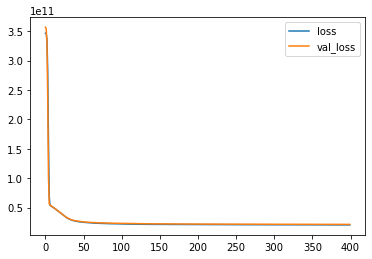

In [75]:
loss_non_top.plot()

NOw we carry out some predictions based on the test set

In [79]:
predictions_non_top = model_non_top.predict(X_test_non_top)

201/201 [==============================] - 0s 1ms/step


In [80]:
predictions_non_top

array([[811117.1 ],
       [561291.25],
       [449032.84],
       ...,
       [487086.9 ],
       [459212.94],
       [627986.06]], dtype=float32)

We evaluate our model

In [82]:
mean_absolute_error(y_test_non_top, predictions_non_top)

97659.5612395265

We observe that the mean_absolute_error is slightly lower, but it is still not good enought

In [83]:
mean_squared_error(y_test_non_top, predictions_non_top)

21262546554.923183

In [84]:
mean_squared_error(y_test_non_top, predictions_non_top)**0.5

145816.82534921402

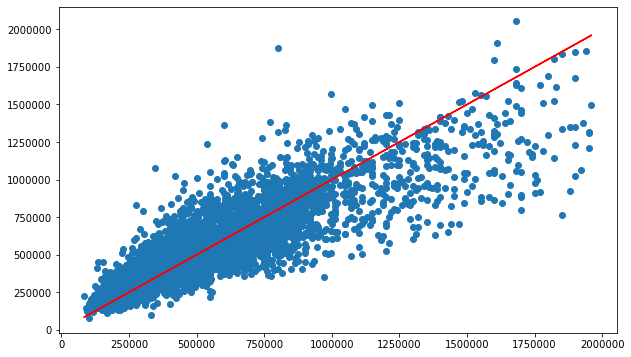

In [81]:
plt.figure(figsize=(10,6))
plt.scatter(y_test_non_top, predictions_non_top)
plt.plot(y_test_non_top, y_test_non_top, 'r')

### We observe that our model predictions are not perfect (both models), but it seems profitable to give it a chance

For example, we can get a single house of our data set, and see if the prediction corresponds to the real sell price

In [85]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


Now this house must be our X_test, so we must scale it and drop the 'price column'. then try out model with it.

In [86]:
single_house = df.drop(['price'], axis=1).iloc[0]

In [87]:
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

NOw we create a numpy array out of single house values

In [88]:
single_house = single_house.values
single_house

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

We have to reshape it. -1 means keep those old dimensions along tha axis

In [90]:
single_house = single_house.reshape(-1,19)
single_house

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [91]:
single_house = scaler.transform(single_house)

In [92]:
single_house

array([[0.0625    , 0.07142857, 0.11005435, 0.00440618, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.11489362,
        0.        , 0.47826087, 0.        , 0.57158945, 0.21434529,
        0.17455018, 0.00574235, 0.        , 0.81818182]])

In [93]:
model.predict(single_house)

1/1 [==============================] - 0s 18ms/step


array([[302447.16]], dtype=float32)

In [94]:
model_non_top.predict(single_house)

1/1 [==============================] - 0s 18ms/step


array([[280614.53]], dtype=float32)

In [95]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
